<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

<div class="alert alert-block alert-info">
    <h2 align="center">Importing Libraries</h2>
</div>

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-block alert-info">
    <h2 align="center">Load and prepare data</h2>
</div>

In [2]:
#### Reading googleplaystore.csv file
df = pd.read_csv('googleplaystore.csv')

In [3]:
#### Checking the shape of the data. It has 13 columns and 10841 rows
df.shape

(10841, 13)

In [4]:
#### Printing 5 random rows of data
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5002,AE Coin Mania : Arcade Fun,GAME,4.3,30002,29M,"1,000,000+",Free,0,Teen,Casino,"February 8, 2018",2.3.5,4.0.3 and up
4521,Q-slope,TOOLS,4.5,2,3.9M,50+,Paid,$1.76,Everyone,Tools,"December 3, 2017",5.0,4.3 and up
10526,Fairy Kingdom: World of Magic and Farming,FAMILY,4.4,129542,63M,"1,000,000+",Free,0,Everyone,Strategy;Creativity,"July 23, 2018",2.4.9,4.0.3 and up
90,SMS Park,AUTO_AND_VEHICLES,4.5,3617,7.9M,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 16, 2018",2.8.2,4.1 and up
5584,CAPTCHA Pack for Sleep as Android,LIFESTYLE,4.0,448,3.1M,"50,000+",Free,0,Everyone,Lifestyle,"June 8, 2018",1.3,2.3 and up


In [5]:
#### Different columns present in data
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
#### Data has 13 columns and 10841 rows
#### Columns Rating, Type, Content Rating, Current Ver and Android Ver have null data in them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<div class="alert alert-block alert-info">
    <h3 align="center">Checking and removing duplicates</h3>
</div>

In [7]:
df.drop_duplicates(subset='App' , inplace=True)

<div class="alert alert-block alert-info">
    <h3 align="center">Removing inappropriate data based on category</h3>
</div>

In [8]:
df = df.drop(df[df['Category'] == '1.9'].index)

<div class="alert alert-block alert-info">
    <h3 align="center">There are 1463 rows of NaN value in Rating</h3>
    <h4 align="center">Since there are other useful information in these rows rather than deleting, all NaN values are set to                          mean value of rating.</h4>
</div>

In [9]:
rating_mean = df['Rating'].mean()
df['Rating'].fillna(rating_mean , inplace=True)

<div class="alert alert-block alert-info">
    <h3 align="center">Changing Reviews to integer</h3>
</div>

In [10]:
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))

<div class="alert alert-block alert-info">
    <h3 align="center">Coverting KB to MB , object to float64 and Varies with device to the mean of Size</h3>
</div>

In [11]:
# Function for converting Varies with device to None

def varies_correction(x):
    if str(x) == 'Varies with device':
        return None
    return x

# Function for converting kb to Mb and also to float

def convert_to_mb_float(x):
    
    if 'M' in str(x):
        x = x.replace('M' , '')
        return float(x)
    elif 'k' in str(x):
        x = x.replace('k' , '')
        return float(x) / 1000
    else:
        return x

In [12]:
df['Size'] = df['Size'].apply(varies_correction)
df['Size'] = df['Size'].apply(convert_to_mb_float)
size_mean = df['Size'].mean()
df['Size'].fillna(size_mean , inplace=True)

<div class="alert alert-block alert-info">
    <h3 align="center">Coverting Installs to integer and dropping 0 values</h3>
</div>

In [13]:
# function to convert installs values to int64

def convert_to_int(x):
    
    x = str(x).replace('+' , '')
    x = str(x).replace(',' , '')
    return int(x)

In [14]:
df['Installs'] = df['Installs'].apply(convert_to_int)
df.drop(df[df['Installs'] == 0].index , inplace=True)

<div class="alert alert-block alert-info">
    <h3 align="center">Coverting Price columns to float64</h3>
</div>

In [15]:
df['Price'] = df['Price'].apply(lambda x : float(str(x).replace('$' , '')))

<div class="alert alert-block alert-info">
    <h3 align="center">Checking for inappropriate values</h3>
</div>

In [16]:
df[(df['Type'] == 'Free') & (df['Price'] != 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9644 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9644 non-null   object 
 1   Category        9644 non-null   object 
 2   Rating          9644 non-null   float64
 3   Reviews         9644 non-null   int64  
 4   Size            9644 non-null   float64
 5   Installs        9644 non-null   int64  
 6   Type            9644 non-null   object 
 7   Price           9644 non-null   float64
 8   Content Rating  9644 non-null   object 
 9   Genres          9644 non-null   object 
 10  Last Updated    9644 non-null   object 
 11  Current Ver     9636 non-null   object 
 12  Android Ver     9642 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


<div class="alert alert-block alert-info">
    <h2 align="center">EDA (Use Pandas)</h2>
    <h2 align="center">Visualization with Seaborn</h2>
</div>

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>mean value of Rating columns is close to it's maximum, meaning most of the Apps were reviewed favourably</li>
        <li>There is no correlation between numbers of installs and reviews</li>
        <li>Due to the huge number of free Apps, price data is skewed towards 0</li>
        <li>Most Apps size are between 20 and 40 MB</li>
    </ul>
</div>

In [18]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9644.000000,9.644000e+03,9644.000000,9.644000e+03,9644.000000
mean,4.173243,2.169294e+05,20.405983,7.789604e+06,0.976018
std,0.494697,1.832723e+06,20.398194,5.379920e+07,15.657631
min,1.000000,0.000000e+00,0.008500,1.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.200000,9.765000e+02,16.000000,1.000000e+05,0.000000
75%,4.500000,2.946775e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


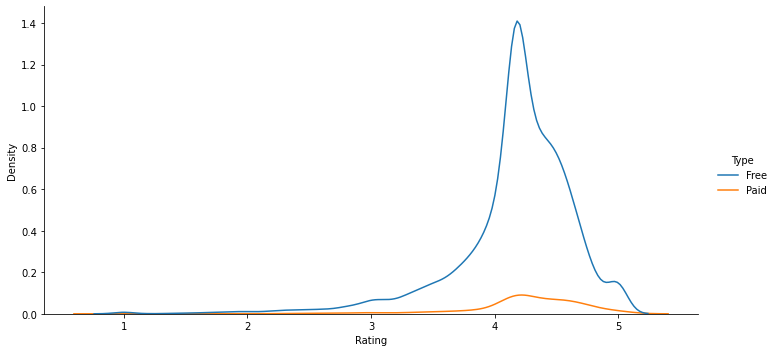

In [56]:
sns.displot(df , x='Rating' , hue='Type' , kind='kde' , aspect=2)

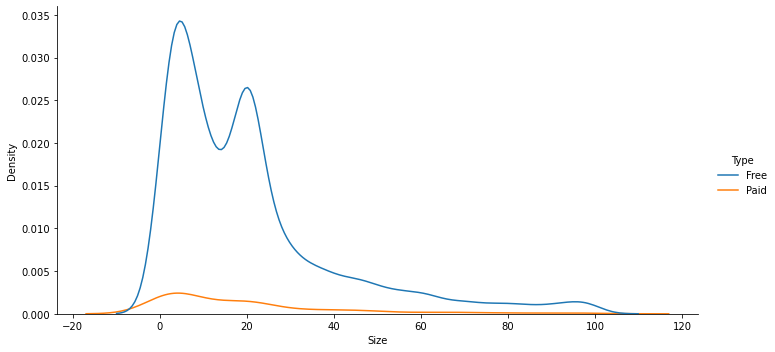

In [57]:
sns.displot(df , x='Size' , hue='Type' , kind='kde', aspect=2)

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>Free Apps are the favoured form of releasing</li>
        <li>More than 90 percent of Apps in every content rating were free</li>
    </ul>
</div>

In [59]:
pd.crosstab(df.Type,df['Content Rating'],normalize='columns')

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,1.0,0.918135,0.903427,0.954198,0.950677,1.0
Paid,0.0,0.081865,0.096573,0.045802,0.049323,0.0


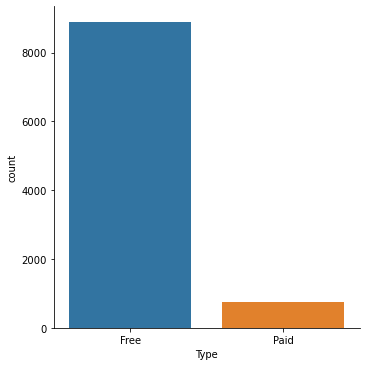

In [61]:
sns.catplot(x='Type' , kind='count' , data=df)

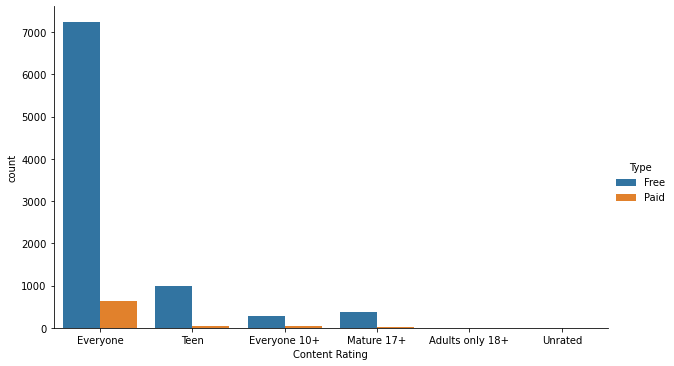

In [62]:
sns.catplot(x='Content Rating' , kind='count' , hue='Type' , data=df , aspect=1.69)

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>There is not much difference in ratings between free and paid apps</li>
        <li>There are huge difference between numbers of reviews and installs in free and paid apps</li>
    </ul>
</div>

In [77]:
df.groupby('Type').mean().reset_index()

,Type,Rating,Reviews,Size,Installs,Price
0,Free,4.167381,234375.315689,20.508748,8.436230e+06,0.000000
1,Paid,4.243164,8841.843164,19.180249,7.689662e+04,12.617587


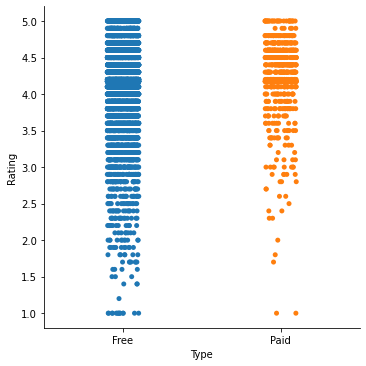

In [78]:
sns.catplot(x='Type' , y='Rating' , data=df)

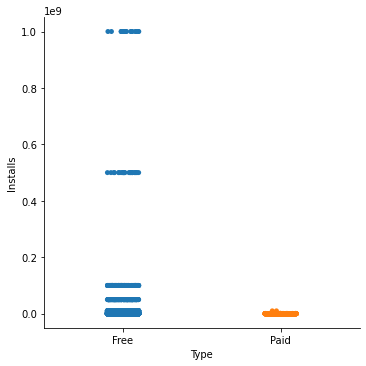

In [83]:
sns.catplot(x='Type' , y='Installs' , data=df)

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>Communication , Entertainment , Social and Game apps were the most downloaded apps</li>
        <li>Family, Game and tools have the most apps number</li>
    </ul>
</div>

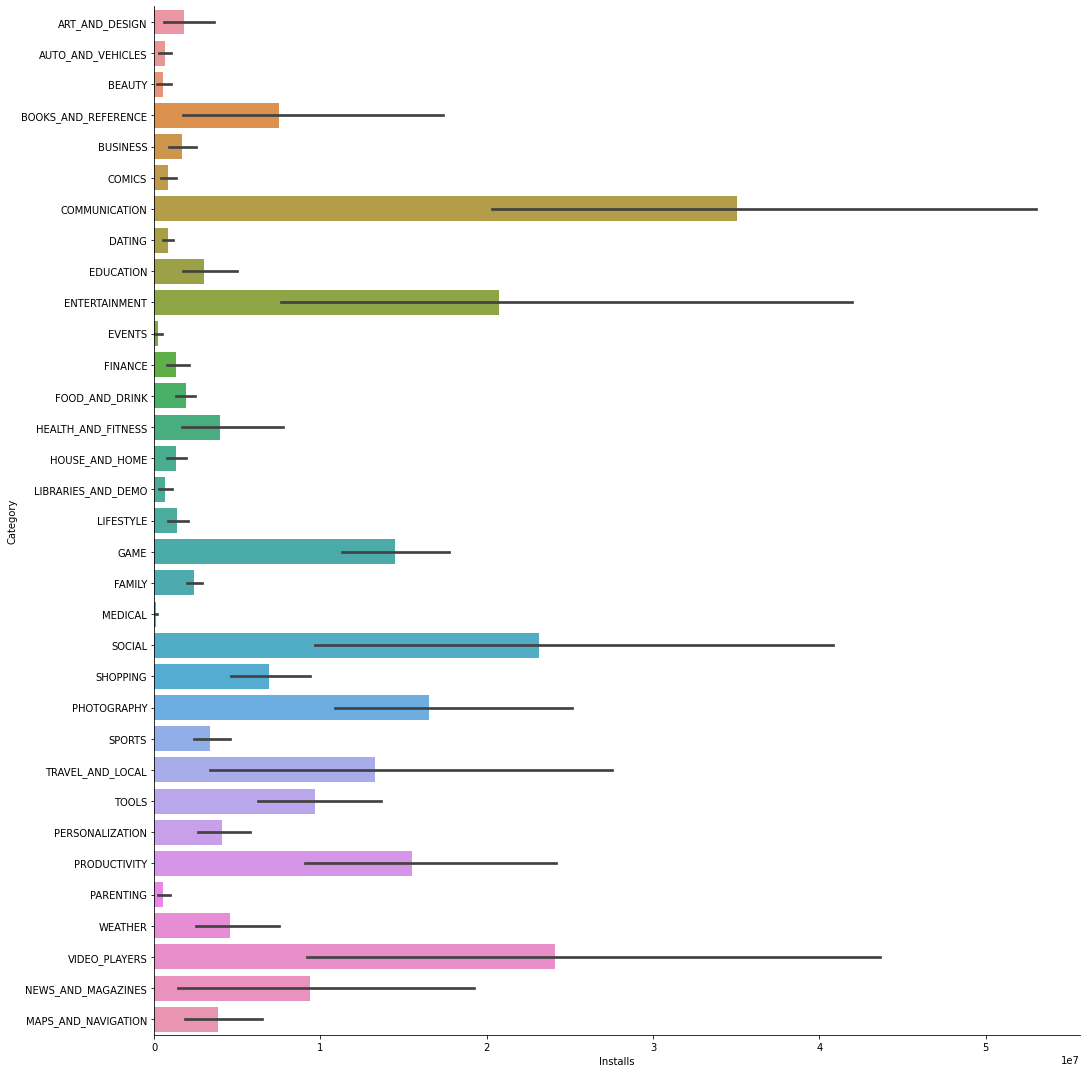

In [116]:
ax = sns.catplot(x='Installs' , y='Category' , kind='bar' , height=15 , data=df)

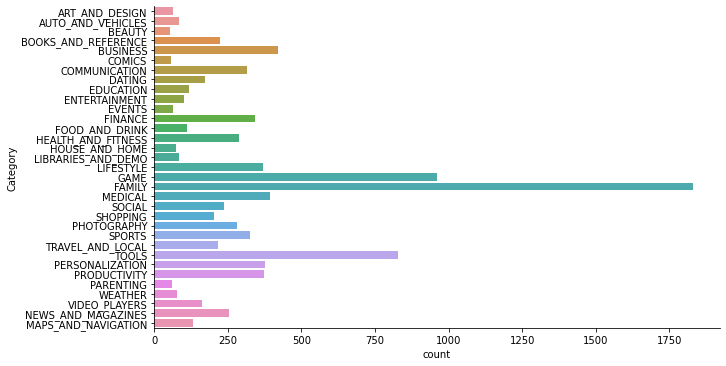

In [123]:
sns.catplot(y='Category' , kind='count' , aspect=2 , data=df)

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>Even though Apps rated for everyone are the most common apps they were only download as many time as mature +                   17</li>
        <li>Teen and Everyone +10 were the most downloaded apps</li>
    </ul>
</div>

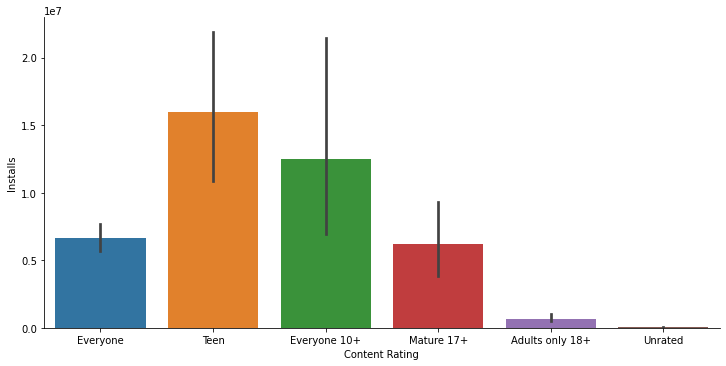

In [119]:
sns.catplot(x='Content Rating' , y='Installs' , kind='bar', aspect=2 , data=df)

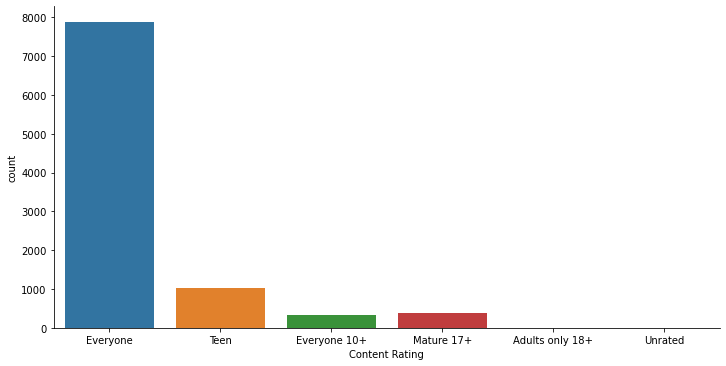

In [121]:
sns.catplot(x='Content Rating' , kind='count' , aspect=2 , data=df)

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>It seem there is no clear correlation between number of Installs and Rating and Size</li>
    </ul>
</div>

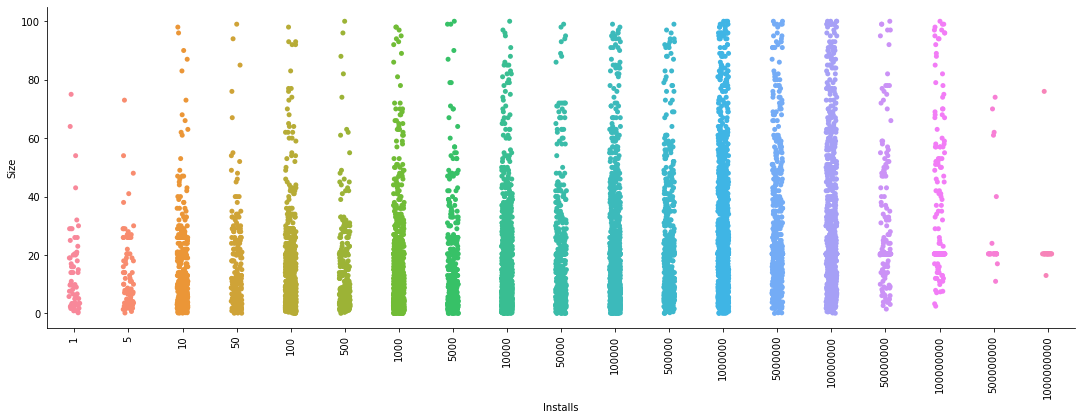

In [128]:
ax = sns.catplot(x='Installs' , y='Size' , aspect=3 , data=df)
ax.set_xticklabels(rotation=90)

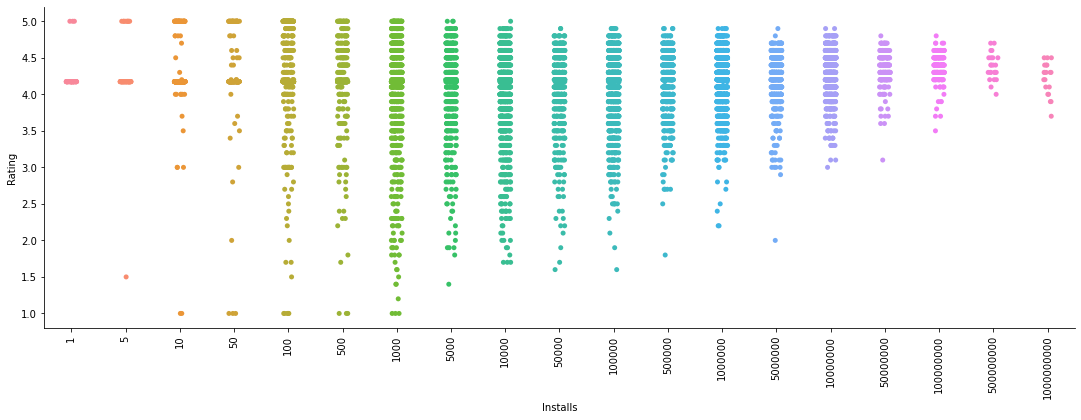

In [129]:
ax = sns.catplot(x='Installs' , y='Rating' , aspect=3 , data=df)
ax.set_xticklabels(rotation=90)

<div class="alert alert-block alert-info">
    <h3 align="center">Anaylsis</h3>
    <ul align="center">
        <li>Generally lower sized apps had more varied ratings </li>
    </ul>
</div>

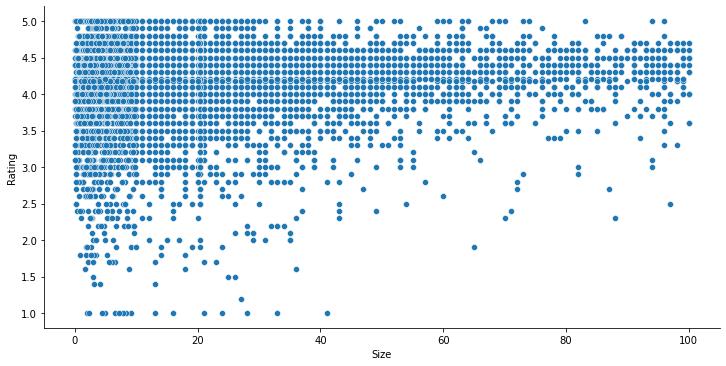

In [156]:
sns.relplot(x='Size' , y='Rating' , aspect=2 , data=df)